# Try with spectral-cube¶

http://spectral-cube.readthedocs.io/en/latest/index.html

In [2]:
import astropy.units as u
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import BooleanArrayMask
import matplotlib.pyplot as plt
%matplotlib inline  

/usr/local/lib/python2.7/dist-packages/ipython-4.0.3-py2.7.egg/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
cube1= SpectralCube.read('CUBEEXPtoFINAL.fits',hdu=1)The

/usr/local/lib/python2.7/dist-packages/spectral_cube/spectral_cube.py:252: UserWarning: radio_beam is not installed. No beam can be created.
  warnings.warn("radio_beam is not installed. No beam "
/usr/local/lib/python2.7/dist-packages/spectral_cube/spectral_cube.py:263: UserWarning: Could not parse beam information from header.  Exception was: UnboundLocalError("local variable 'Beam' referenced before assignment",)
  "  Exception was: {0}".format(ex.__repr__()))


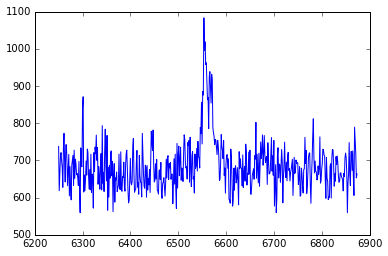

In [4]:
wavemin, wavemax = [1200,1700] 
spectra = cube1[:, 258, 229]
plt.plot(cube1.spectral_axis[wavemin:wavemax],spectra.value[wavemin:wavemax])

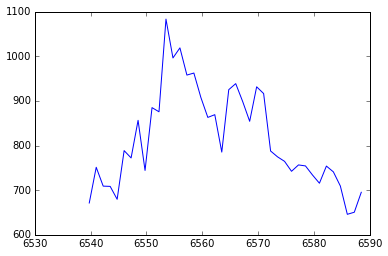

In [5]:
rr = 20
wavemin, wavemax = [1452-rr,1452+rr] 
spectra = cube1[:, 258, 229]
plt.plot(cube1.spectral_axis[wavemin:wavemax],spectra.value[wavemin:wavemax])

/usr/local/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:662: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


RuntimeError: module compiled against API version a but this version of numpy is 9

/usr/local/lib/python2.7/dist-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:
INFO:astropy:Auto-setting vmin to -4.345e+03
INFO:astropy:Auto-setting vmax to  4.737e+04


INFO: Auto-setting vmin to -4.345e+03 [aplpy.core]
INFO: Auto-setting vmax to  4.737e+04 [aplpy.core]


/usr/local/lib/python2.7/dist-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


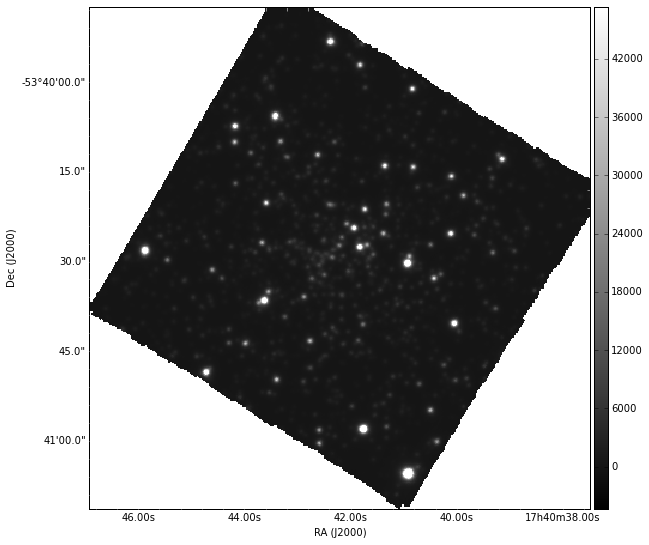

In [6]:
halpha = cube1.spectral_slab(6550*u.angstrom, 6560*u.angstrom).median(axis=0)
halpha.quicklook()

INFO:astropy:Auto-setting vmin to -3.909e+03
INFO:astropy:Auto-setting vmax to  5.587e+02


INFO: Auto-setting vmin to -3.909e+03 [aplpy.core]
INFO: Auto-setting vmax to  5.587e+02 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -3.909e+03
INFO:astropy:Auto-setting vmax to  5.587e+02


: Auto-setting vmin to -3.909e+03 [aplpy.core]
INFO: Auto-setting vmax to  5.587e+02 [aplpy.core]


NameError: name 'img' is not defined

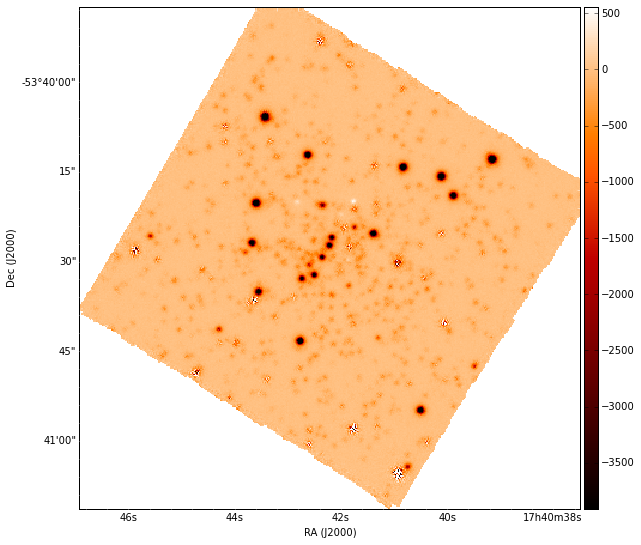

In [12]:
todos = cube1.spectral_slab(6400*u.angstrom, 6500*u.angstrom).mean(axis=0)
resta = halpha - todos
#resta.write('restaHalpha2.fits')
resta.quicklook()
lmc =resta.FITSFigure
lmc.set_tick_labels_format(xformat='hh:mm:ss',yformat='dd:mm:ss')
lmc.show_colorscale(cmap='gist_heat')
#lmc.show_grayscale(stretch='arcsinh',invert=True)
img.show_grayscale(stretch='arcsinh', vmin=1, vmax=10,invert=True)
lmc.show_grid()
lmc.set_grid_alpha(0.2)
lmc.set_grid_color('black')
lmc.set_axis_labels_size('18')
lmc.set_tick_labels_size('16')
lmc.set_tick_color('black')

# Negative to Zeros

In [235]:
image = fits.open('restaHalpha3.fits',mode='update')
scidata = image[0].data 
scidata[scidata < 0] = 0
image.flush()